In [1]:
# install dependencies
!pip install pandas>=1.1.4

In [2]:
# open yolov5 and install requirements
!cd yolov5 & pip install -r requirements.txt

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pmdarima 1.8.2 requires numpy~=1.19.0, but you'll have numpy 1.21.4 which is incompatible.


  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


In [3]:
# install all the packages
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html


Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



In [1]:
#import the packages
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
# Load the trained model 
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Louiz/.cache\torch\hub\master.zip
YOLOv5  2021-12-16 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
# Load a test image
img = os.path.join('Desktop', 'selena.png')

In [4]:
# load the trained model
ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"
ageNet = cv2.dnn.readNet(ageModel,ageProto)
ageList =['(0-4)','(4-6)', '(8-12)', '(15-20)', '(20-25)','(25,30)', '(30-45)', '(45-55)', '(60-100)']
MODEL_MEAN_VALUES= (78.4263377603, 87.7689143744, 114.895847746)


In [5]:
# Run the yoloV5 model
results = model(img)


In [6]:
# show the detection results
results.print()


image 1/1: 247x185 1 female
Speed: 787.2ms pre-process, 712.0ms inference, 645.5ms NMS per image at shape (1, 3, 640, 480)


In [7]:
# pass the output from the first model to the second one
blob = cv2.dnn.blobFromImage(np.squeeze(results.render()), 1.0, (227,227),MODEL_MEAN_VALUES, swapRB=False)
ageNet.setInput(blob)
agePred= ageNet.forward()
age=ageList[agePred[0].argmax()]


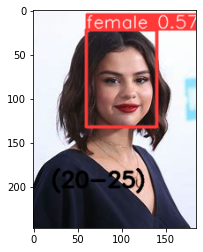

In [8]:
# Display the result

%matplotlib inline 
plt.imshow(cv2.putText(np.squeeze(results.render()),age,(20,200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2, cv2.LINE_AA)
)
plt.show()


In [9]:
cv2.imwrite('ena_pred.png',np.squeeze(results.render()))

True

In [10]:
import easyocr

reader = easyocr.Reader(['en'])
result = reader.readtext(cv2.putText(np.squeeze(results.render()),age,(20,200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2, cv2.LINE_AA))
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[56, 2], [178, 2], [178, 26], [56, 26]], 'female 0.5', 0.805250433838302),
 ([[17, 175], [133, 175], [133, 213], [17, 213]],
  '(20-25)',
  0.3364280069508499)]

In [11]:
# create a function to extract the gender from the easyocr output
def gender(ch):
    if (ch=="f"):
        return "female"
    elif (ch=="m"):
        return "male"
    else:
        return "no detection"

In [12]:
# create a function to extract the age from the easyocr output

def extract_age(result):
    return result[len(result)-1][-2]

In [13]:
# load the datetime package
from datetime import datetime


In [14]:
# save actual time and date
now = datetime.now()
print("",now)

 2021-12-16 22:34:50.862692


In [15]:
# current date and time
date = now.strftime("%d/%m/%Y")
print("date", date)

date 16/12/2021


In [16]:
# current date and time
time = now.strftime("%H:%M:%S")
print("time:", time)

time: 22:34:50


In [17]:
# save the results in a csv file
import csv
    
# field names 
fields = ['Date', 'Time', 'Age', 'Gender'] 
    
# data rows of csv file 
rows = [[date,time,extract_age(result),gender(result[0][-2][0])]] 
if (os.path.exists('Saved_Date')==False):
    with open('Saved_Date', 'w') as f:
      
        # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerow(fields)

        write.writerows(rows)
        
else :
    with open('Saved_Date', 'a') as f:
      
        # using csv.writer method from CSV package
        write = csv.writer(f)
      
        write.writerows(rows)